## HW3 Problem 3
## Name: Liam Jackson

### Imports

In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import sklearn.metrics as sk
import seaborn as sns

### 1. Loading the data



In [2]:
# training images
with open('train-images-idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    train_data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    train_data = train_data.reshape((size, nrows, ncols))
# training labels
with open('train-labels-idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    train_labels = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))

# test images
with open('t10k-images-idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    test_data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    test_data = test_data.reshape((size, nrows, ncols))

# test labels
with open('t10k-labels-idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    test_labels = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))

In [3]:
print(f'The shape of the training image array is: {train_data.shape}')
print(f'The shape of the testing image array is: {test_data.shape}')
print(f'The shape of the training label array is: {train_labels.shape}')
print(f'The shape of the testing label array is: {test_labels.shape}')

The shape of the training image array is: (60000, 28, 28)
The shape of the testing image array is: (10000, 28, 28)
The shape of the training label array is: (60000,)
The shape of the testing label array is: (10000,)


#### c. Image plots

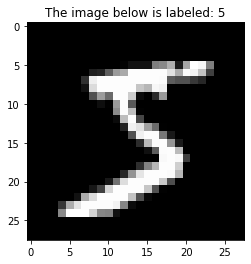

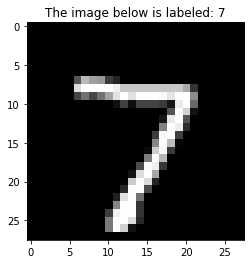

The images match their labels.


In [4]:
train_im1 = train_data[0,:,:]
plt.imshow(train_im1, cmap = 'gray')
plt.title(f'The image below is labeled: {train_labels[0]}')
plt.show()

test_im1 = test_data[0,:,:]
plt.imshow(test_im1, cmap = 'gray')
plt.title(f'The image below is labeled: {test_labels[0]}')
plt.show()

print('The images match their labels.')

#### d. Image plot (10x10 grid)

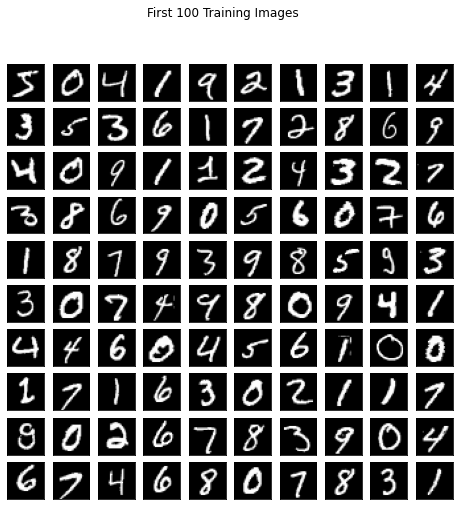

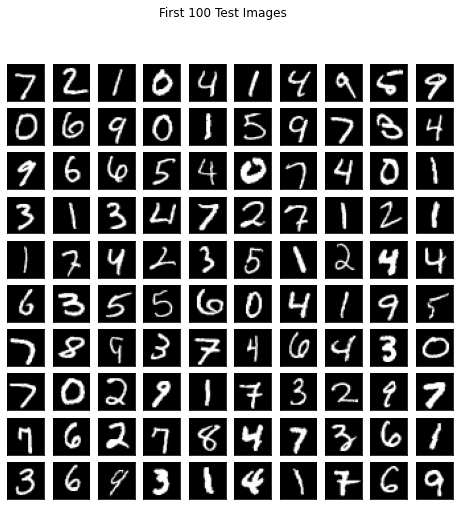

In [5]:
w= 28
h= 28
fig=plt.figure(figsize=(8, 8))
cols = 10
rows = 10
for i in range(1, cols*rows +1):
    train_im1010 = train_data[i-1,:,:]
    fig.add_subplot(rows, cols, i)
    plt.imshow(train_im1010,cmap='gray')
    plt.tick_params(
        axis='both',       
        which='both',      
        bottom=False,      
        left=False,         
        labelbottom=False,
        labelleft=False)
plt.suptitle('First 100 Training Images')
plt.show()

fig=plt.figure(figsize=(8, 8))
for i in range(1, cols*rows +1):
    test_im1010 = test_data[i-1,:,:]
    fig.add_subplot(rows, cols, i)
    plt.imshow(test_im1010,cmap='gray')
    plt.tick_params(
        axis='both',       
        which='both',      
        bottom=False,      
        left=False,         
        labelbottom=False,
        labelleft=False)
plt.suptitle('First 100 Test Images')
plt.show()

#### e. Digit frequency

In [6]:
train_labels_100_uniq, train_labels_100_cts = np.unique(train_labels[0:100], return_counts=True)
print('Digit frequencies in the first 100 training images:')
print(np.asarray((train_labels_100_uniq, train_labels_100_cts)))

test_labels_100_uniq, test_labels_100_cts  = np.unique(test_labels[0:100], return_counts=True)
print('Digit frequencies in the first 100 test images:')
print(np.asarray((test_labels_100_uniq, test_labels_100_cts)))

Digit frequencies in the first 100 training images:
[[ 0  1  2  3  4  5  6  7  8  9]
 [13 14  6 11 11  5 11 10  8 11]]
Digit frequencies in the first 100 test images:
[[ 0  1  2  3  4  5  6  7  8  9]
 [ 8 14  8 11 14  7 10 15  2 11]]


### 2. Data prepartion
####  Normalization and reshaping

In [7]:
# Reduce data to first 6000 to save computation time
train_data = train_data[0:6000,:,:]
train_labels = train_labels[0:6000]

train_labels_uniq, train_labels_cts = np.unique(train_labels, return_counts=True)
print('Digit frequencies in the first 6000 training images:')
print(np.asarray((train_labels_uniq, train_labels_cts)))

test_labels_uniq, test_labels_cts  = np.unique(test_labels, return_counts=True)
print('\nDigit frequencies in the first 6000 test images:')
print(np.asarray((test_labels_uniq, test_labels_cts)))

train_data_norm = np.reshape(train_data / 255.0, (-1, 28*28)).T
print(f'\nThe shape of the new training data array is: {train_data_norm.shape}')

test_data_norm = np.reshape(test_data / 255.0, (-1, 28*28)).T
print(f'The shape of the new test data array is: {test_data_norm.shape}')

Digit frequencies in the first 6000 training images:
[[  0   1   2   3   4   5   6   7   8   9]
 [592 671 581 608 623 514 608 651 551 601]]

Digit frequencies in the first 6000 test images:
[[   0    1    2    3    4    5    6    7    8    9]
 [ 980 1135 1032 1010  982  892  958 1028  974 1009]]

The shape of the new training data array is: (784, 6000)
The shape of the new test data array is: (784, 10000)


#### One-hot encoding of labels

In [8]:
train_labels_ohenc = np.zeros([10, len(train_labels)])
for inst in range(len(train_labels)):
    train_labels_ohenc_idx = train_labels[inst] 
    train_labels_ohenc[train_labels_ohenc_idx, inst] = 1
        
test_labels_ohenc = np.zeros([10, len(test_labels)])
for inst in range(len(test_labels)):
    test_labels_ohenc_idx = test_labels[inst] 
    test_labels_ohenc[test_labels_ohenc_idx, inst] = 1
    
print(f'The shape of the one-hot encoded training labels array is: {train_labels_ohenc.shape}')    
print(f'The shape of the one-hot encoded testing labels array is: {test_labels_ohenc.shape}')    

print(f'\nThe first training label is: {train_labels[0]}')
print(f'Its associated vector is: {np.asarray(train_labels_ohenc[:,0])}')

print(f'\nThe first test label is: {test_labels[0]}')
print(f'Its associated vector is: {np.asarray(test_labels_ohenc[:,0])}')

The shape of the one-hot encoded training labels array is: (10, 6000)
The shape of the one-hot encoded testing labels array is: (10, 10000)

The first training label is: 5
Its associated vector is: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

The first test label is: 7
Its associated vector is: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### 3. Neural Network

#### Computational graph

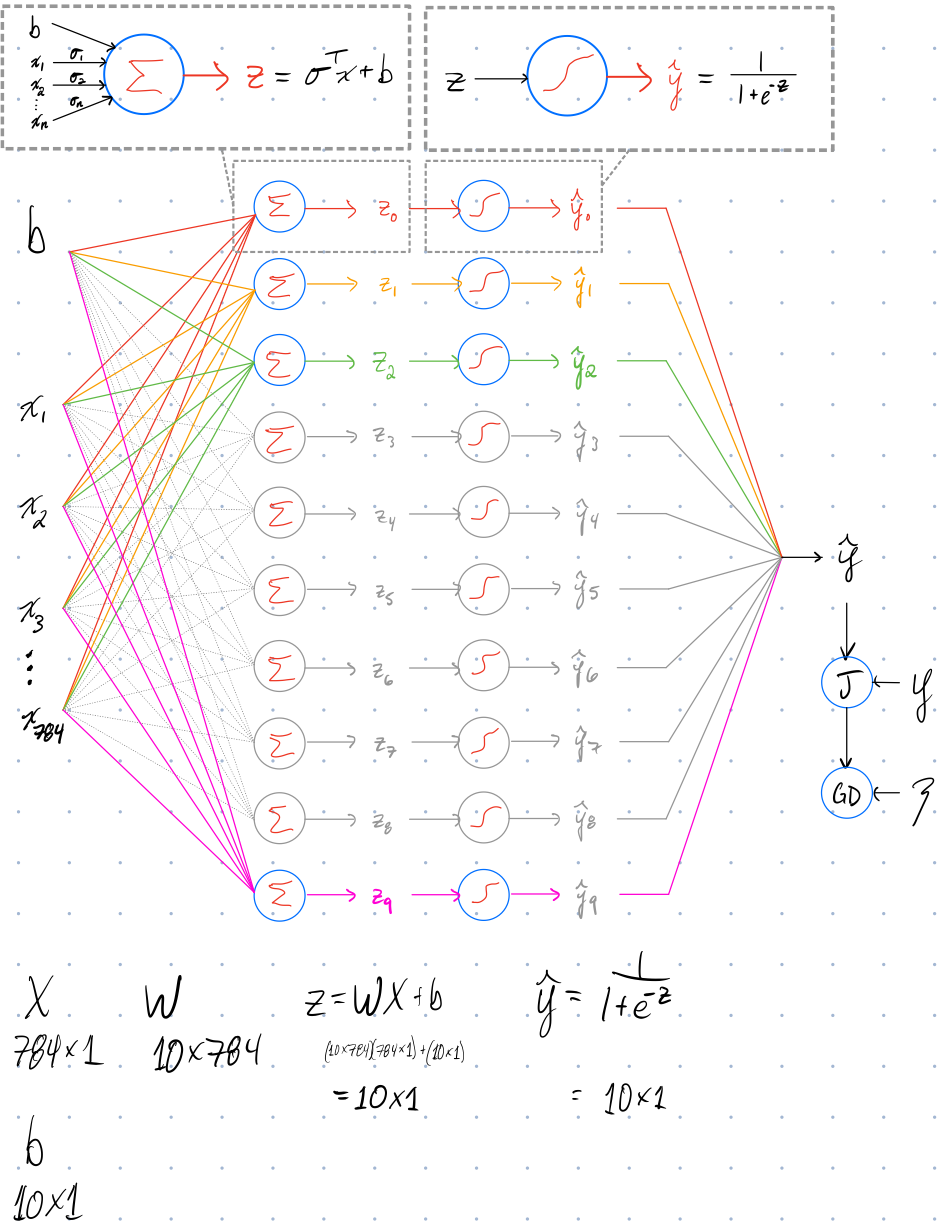

In [9]:
tf.reset_default_graph()
# Number of features/dimensions
n_dim = 784
# Number of neurons in layers 1 and 2
n1 = 10 
n2 = 1 
# --- Input / Output Placeholders
X = tf.placeholder(tf.float64, [n_dim, None])
Y = tf.placeholder(tf.float64, [10, None])
# --- First Layer Weights and Bias
W1 = tf.Variable(tf.random.normal([n1, n_dim], stddev=.1, seed=12345, dtype=tf.float64),
                 dtype=tf.float64)
b1 = tf.Variable(tf.random.normal([n1,1], stddev=.1, seed=12345, dtype=tf.float64),
                 dtype=tf.float64)
# --- Learning Rate
learning_rate = tf.placeholder(tf.float64, shape = ())
# --- First Layer z vals, Output
z = tf.matmul(W1, X) + b1
Y_ = tf.sigmoid(z)
# --- Training Statistics
digit_predictions = tf.argmax(Y_,0)
digit_true = tf.argmax(Y,0)
correct_predictions = tf.equal(digit_predictions, digit_true)
accuracy = tf.reduce_mean(tf.cast(correct_predictions,
                                  dtype=tf.float64))
# --- Variable Initialization
init = tf.global_variables_initializer()
# --- Cost Function
cost_fxn = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=Y),1)
# --- Gradient Descent
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_fxn)
# --- Saving Node
saver = tf.train.Saver()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Training function

In [10]:
def nn_train(training_data, training_labels, num_epochs, learn_rate):
    sess = tf.Session()
    sess.run(init)
    cost_history = np.empty(shape=[0], dtype = float)
    
    for epoch in range(num_epochs):
        training_step_, cost_ = sess.run([training_step, cost_fxn], 
                                         feed_dict ={X: training_data, 
                                                     Y: training_labels, 
                                                     learning_rate: learn_rate})        
        cost_history = np.append(cost_history, np.mean(cost_))        
        
        accuracy_ = accuracy.eval({X: training_data, 
                                   Y: training_labels, 
                                   learning_rate: learn_rate}, 
                                  session=sess)
        
        if epoch % 500 == 0:
            print(f'Epoch {epoch} reached, with mean cost of {np.mean(cost_)}')
            print("Accuracy:", accuracy_)
    print ("Final Accuracy:", accuracy_)
    
    ep_str = str(num_epochs)
    lr_str = '_'.join(str(learn_rate).split('.'))
    file_name_ = '_'.join((ep_str, 'ep', lr_str, 'lr'))
    file_name = "%s/trained_model.cpkt" % file_name_
        
    save_path = saver.save(sess, file_name)        
    return sess, cost_history, save_path

### 4. Training and testing

#### a. Cost history

In [11]:
epochs1 = 10001
learning_rate1 = .05
sess1, cost_history1, spath1 = nn_train(train_data_norm,
                                        train_labels_ohenc,
                                        epochs1,
                                        learning_rate1)
sess1.close()

Epoch 0 reached, with mean cost of 0.6404056534110572
Accuracy: 0.20333333333333334
Epoch 500 reached, with mean cost of 0.10094980011976343
Accuracy: 0.88
Epoch 1000 reached, with mean cost of 0.08585776065521449
Accuracy: 0.8965
Epoch 1500 reached, with mean cost of 0.07891588946091989
Accuracy: 0.9043333333333333
Epoch 2000 reached, with mean cost of 0.07458169668748314
Accuracy: 0.9093333333333333
Epoch 2500 reached, with mean cost of 0.07148200457608998
Accuracy: 0.9133333333333333
Epoch 3000 reached, with mean cost of 0.06909044570536527
Accuracy: 0.916
Epoch 3500 reached, with mean cost of 0.06715414883272393
Accuracy: 0.919
Epoch 4000 reached, with mean cost of 0.06553334983331613
Accuracy: 0.9225
Epoch 4500 reached, with mean cost of 0.0641431023235331
Accuracy: 0.9255
Epoch 5000 reached, with mean cost of 0.06292812968998782
Accuracy: 0.928
Epoch 5500 reached, with mean cost of 0.061850564862116465
Accuracy: 0.9288333333333333
Epoch 6000 reached, with mean cost of 0.060883403

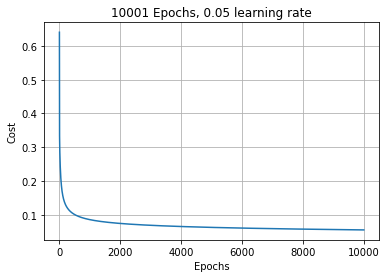

In [12]:
plt.plot(np.arange(epochs1), cost_history1)
plt.title(f'{epochs1} Epochs, {learning_rate1} learning rate')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.grid('on')
plt.show() 

In [13]:
epochs2 = 50001
learning_rate2 = .05
sess2, cost_history2, spath2 = nn_train(train_data_norm, 
                                        train_labels_ohenc, 
                                        epochs2, 
                                        learning_rate2)
sess2.close()


Epoch 0 reached, with mean cost of 0.6404056534110572
Accuracy: 0.20333333333333334
Epoch 500 reached, with mean cost of 0.10094980011976343
Accuracy: 0.88
Epoch 1000 reached, with mean cost of 0.08585776065521449
Accuracy: 0.8965
Epoch 1500 reached, with mean cost of 0.07891588946091989
Accuracy: 0.9043333333333333
Epoch 2000 reached, with mean cost of 0.07458169668748314
Accuracy: 0.9093333333333333
Epoch 2500 reached, with mean cost of 0.07148200457608998
Accuracy: 0.9133333333333333
Epoch 3000 reached, with mean cost of 0.06909044570536527
Accuracy: 0.916
Epoch 3500 reached, with mean cost of 0.06715414883272393
Accuracy: 0.919
Epoch 4000 reached, with mean cost of 0.06553334983331613
Accuracy: 0.9225
Epoch 4500 reached, with mean cost of 0.0641431023235331
Accuracy: 0.9255
Epoch 5000 reached, with mean cost of 0.06292812968998782
Accuracy: 0.928
Epoch 5500 reached, with mean cost of 0.061850564862116465
Accuracy: 0.9288333333333333
Epoch 6000 reached, with mean cost of 0.060883403

Epoch 48500 reached, with mean cost of 0.04045978766421668
Accuracy: 0.9565
Epoch 49000 reached, with mean cost of 0.04036768703525682
Accuracy: 0.9566666666666667
Epoch 49500 reached, with mean cost of 0.04027657872016586
Accuracy: 0.9568333333333333
Epoch 50000 reached, with mean cost of 0.04018644215933365
Accuracy: 0.9568333333333333
Final Accuracy: 0.9568333333333333


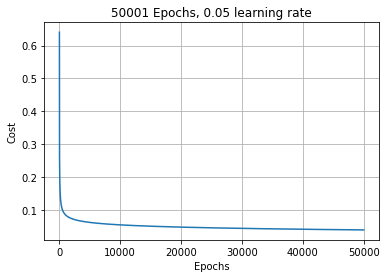

In [14]:
plt.plot(np.arange(epochs2), cost_history2)
plt.title(f'{epochs2} Epochs, {learning_rate2} learning rate')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.grid('on')
plt.show() 

In [15]:
epochs3 = 50001
learning_rate3 = .01
sess3, cost_history3, spath3 = nn_train(train_data_norm, 
                                        train_labels_ohenc, 
                                        epochs3, 
                                        learning_rate3)
sess3.close()

Epoch 0 reached, with mean cost of 0.6404056534110572
Accuracy: 0.18783333333333332
Epoch 500 reached, with mean cost of 0.16238585527267363
Accuracy: 0.8128333333333333
Epoch 1000 reached, with mean cost of 0.13030331971019782
Accuracy: 0.8466666666666667
Epoch 1500 reached, with mean cost of 0.11574564134735313
Accuracy: 0.8628333333333333
Epoch 2000 reached, with mean cost of 0.10698931307260624
Accuracy: 0.8721666666666666
Epoch 2500 reached, with mean cost of 0.10097976325049056
Accuracy: 0.8798333333333334
Epoch 3000 reached, with mean cost of 0.09652288908498582
Accuracy: 0.8838333333333334
Epoch 3500 reached, with mean cost of 0.0930423613486847
Accuracy: 0.8876666666666667
Epoch 4000 reached, with mean cost of 0.09022162459618319
Accuracy: 0.8915
Epoch 4500 reached, with mean cost of 0.08787078818251433
Accuracy: 0.894
Epoch 5000 reached, with mean cost of 0.08586834612679052
Accuracy: 0.8963333333333333
Epoch 5500 reached, with mean cost of 0.0841325877053026
Accuracy: 0.8976

Epoch 49000 reached, with mean cost of 0.05567929289688204
Accuracy: 0.9371666666666667
Epoch 49500 reached, with mean cost of 0.05557540470529691
Accuracy: 0.9375
Epoch 50000 reached, with mean cost of 0.055472692139699374
Accuracy: 0.9376666666666666
Final Accuracy: 0.9376666666666666


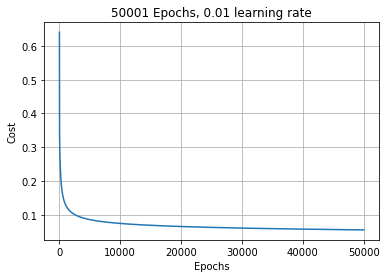

In [16]:
plt.plot(np.arange(epochs3), cost_history3)
plt.title(f'{epochs3} Epochs, {learning_rate3} learning rate')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.grid('on')
plt.show() 

#### b. Confusion matrix

INFO:tensorflow:Restoring parameters from 10001_ep_0_05_lr/trained_model.cpkt


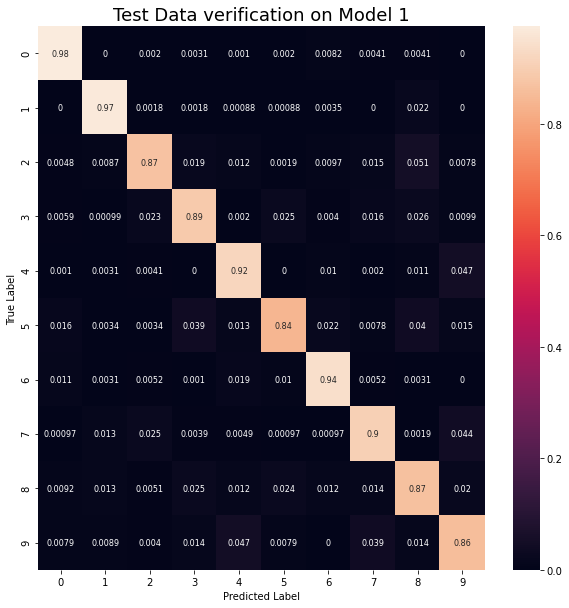

In [17]:
sess1_res = tf.Session()
saver.restore(sess1_res, spath1)
y_pred1 = sess1_res.run(Y_, {X: test_data_norm})
y_pred1 = np.argmax(y_pred1,0)
y_true = test_labels

w1 = sess1_res.run(W1, {X: test_data_norm})

conf_mtx1 = sk.confusion_matrix(y_true, y_pred1, normalize='true')

fig_cm1, ax_cm1 = plt.subplots(figsize=(10,10))
ax_cm1 = sns.heatmap(conf_mtx1, annot=True, annot_kws={'size': 8})
ax_cm1.set_title('Test Data verification on Model 1', fontdict={'fontsize':18})
ax_cm1.set_xlabel('Predicted Label')
ax_cm1.set_ylabel('True Label')
plt.show()


INFO:tensorflow:Restoring parameters from 50001_ep_0_05_lr/trained_model.cpkt


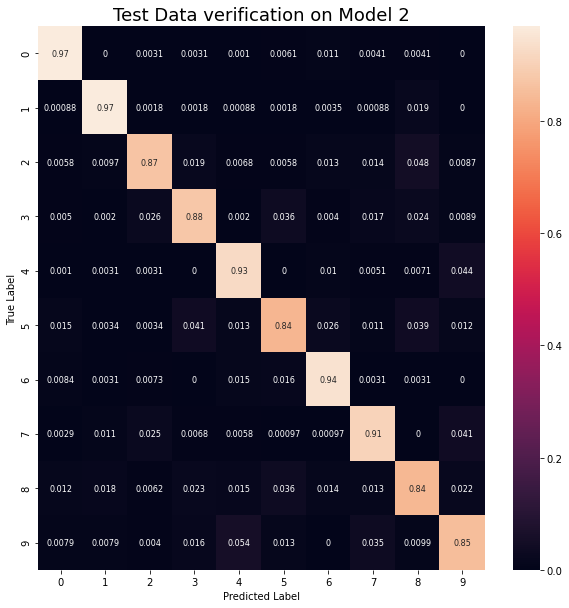

In [18]:
sess2_res = tf.Session()
saver.restore(sess2_res, spath2)
y_pred2 = sess2_res.run(Y_, {X: test_data_norm})
y_pred2 = np.argmax(y_pred2, 0)
y_true = test_labels

conf_mtx2 = sk.confusion_matrix(y_true, y_pred2, normalize='true')

fig_cm2, ax_cm2 = plt.subplots(figsize=(10,10))
ax_cm2 = sns.heatmap(conf_mtx2, annot=True, annot_kws={'size': 8})
ax_cm2.set_title('Test Data verification on Model 2', fontdict={'fontsize':18})
ax_cm2.set_xlabel('Predicted Label')
ax_cm2.set_ylabel('True Label')
plt.show()


INFO:tensorflow:Restoring parameters from 50001_ep_0_01_lr/trained_model.cpkt


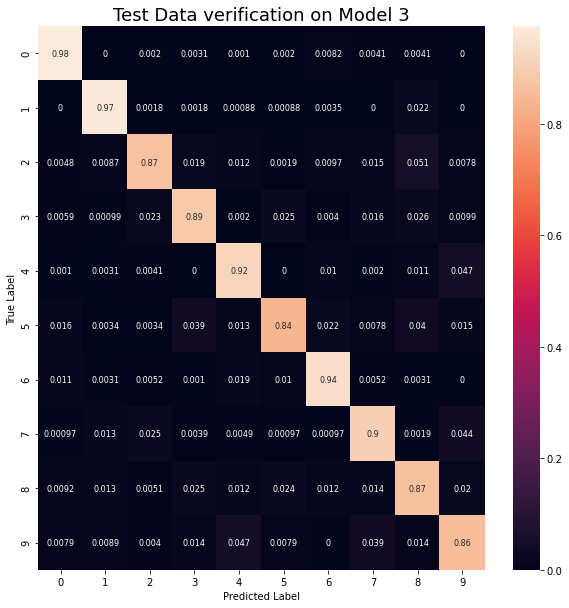

In [19]:
sess3_res = tf.Session()
saver.restore(sess3_res, spath3)
y_pred3 = sess3_res.run(Y_, {X: test_data_norm})
y_pred3 = np.argmax(y_pred3, 0)
y_true = test_labels

w3 = sess3_res.run(W1, {X: test_data_norm})

conf_mtx3 = sk.confusion_matrix(y_true, y_pred3, normalize='true')

fig_cm3, ax_cm3 = plt.subplots(figsize=(10,10))
ax_cm3 = sns.heatmap(conf_mtx3, annot=True, annot_kws={'size': 8})
ax_cm3.set_title('Test Data verification on Model 3', fontdict={'fontsize':18})
ax_cm3.set_xlabel('Predicted Label')
ax_cm3.set_ylabel('True Label')
plt.show()


#### c. Common misclassifications

In [20]:
N = 5
miss_class_conf_mtx3 = conf_mtx3
np.fill_diagonal(miss_class_conf_mtx3, 0)

miss_class_conf_mtx3_flat = miss_class_conf_mtx3.flatten()

idx_most_common = miss_class_conf_mtx3_flat.argsort()[-2*N:]
i_idx, j_idx = np.unravel_index(idx_most_common, miss_class_conf_mtx3.shape)
top_2N_misses = np.fliplr(np.flipud(np.asarray([i_idx, j_idx]).T))
print(f'The most common misclassifications from session 3:\n {top_2N_misses}')
print('where the first column is the predicted digit and the second is the true digit.')


The most common misclassifications from session 3:
 [[8 2]
 [9 4]
 [4 9]
 [9 7]
 [8 5]
 [3 5]
 [7 9]
 [8 3]
 [2 7]
 [5 3]]
where the first column is the predicted digit and the second is the true digit.


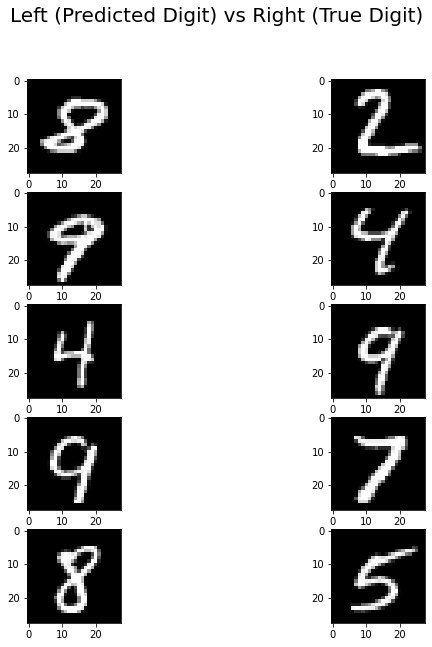

In [21]:
fig_miss, ax_miss  = plt.subplots(N, 2, figsize=(10,10))
fig_miss.suptitle('Left (Predicted Digit) vs Right (True Digit)', fontsize=20)
for miss_img in range(N):
    pred_dig = top_2N_misses[miss_img,0]
    true_dig = top_2N_misses[miss_img,1]
    
    pred_dig_idx = np.where(test_labels == pred_dig)[0][miss_img]
    true_dig_idx = np.where(test_labels == true_dig)[0][miss_img]
    
    ax_miss[miss_img,0].imshow(test_data[pred_dig_idx,:,:], cmap = 'gray')
    ax_miss[miss_img,1].imshow(test_data[true_dig_idx,:,:], cmap = 'gray') 

The predicted digits are based on the positions and intensities of their pixels, and the similarity of that data to training image data. Between the predicted and true digits above, it's easy to recognize that white pixels fall within similar regions between left/right pairs. This indicates to the model that the input data is statistically similar to the data it is familiar with, and so a missclassification results. 

It's interesting to note that the values for permuted "predicted" and "true" labels (ie: 8,2 vs 2,8) are not the same. I looked into this a bit, and found a paper describing that behavior as an indicator of a bad classifier. I'm pretty interested in how this type of thing might be optimized.  